Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions.

Note 

    1.Draw plots to demonstrate the analysis for the following questions for better visualizations.
    2. Write code comments wherever required for code understanding
        Insights to be drawn -
        ● Get all Pokemons whose spawn rate is less than 5%
        ● Get all Pokemons that have less than 4 weaknesses
        ● Get all Pokemons that have no multipliers at all
        ● Get all Pokemons that do not have more than 2 evolutions
        ● Get all Pokemons whose spawn time is less than 300 seconds.
            Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
        ● Get all Pokemon who have more than two types of capabilities


In [1]:
#Importing required modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Ingestion
data= pd.read_excel('pokemon.xlsx')
data.head()

,ID,Num,Name,Img,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Avg Spawns,Spawn Time,Multipliers,Weaknesses,Next Evolution,Previous Evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,1.58,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99,13.0,Bulbasaur Candy,100,NaN,0.042,4,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,0,NaN,0.017,1,11:30,0,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25,2.0,0.253,25,08:45,1.65,"Water, Ground, Rock","Charmeleon, Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100,NaN,0.012,1,19:00,1.79,"Water, Ground, Rock",Charizard,Charmander


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  151 non-null    int64  
 1   Num                 151 non-null    int64  
 2   Name                151 non-null    object 
 3   Img                 151 non-null    object 
 4   Type                151 non-null    object 
 5   Height              151 non-null    float64
 6   Weight              151 non-null    float64
 7   Candy               151 non-null    object 
 8   Candy Count         151 non-null    int64  
 9   Egg                 73 non-null     float64
 10  Spawn Chance        151 non-null    float64
 11  Avg Spawns          151 non-null    int64  
 12  Spawn Time          145 non-null    object 
 13  Multipliers         151 non-null    object 
 14  Weaknesses          151 non-null    object 
 15  Next Evolution      70 non-null     object 
 16  Previous

In [4]:
# Calculate the spawn rate based on average spawns and spawn chance
data['Spawn Rate'] = (data['Avg Spawns'] / 10000) * data['Spawn Chance']

# Filter the DataFrame by spawn rate less than 5%
filtered_df = data[data['Spawn Rate'] < 0.05]

# Get the names of the Pokémon with spawn rate less than 5%
pokemon_names = filtered_df['Name'].tolist()


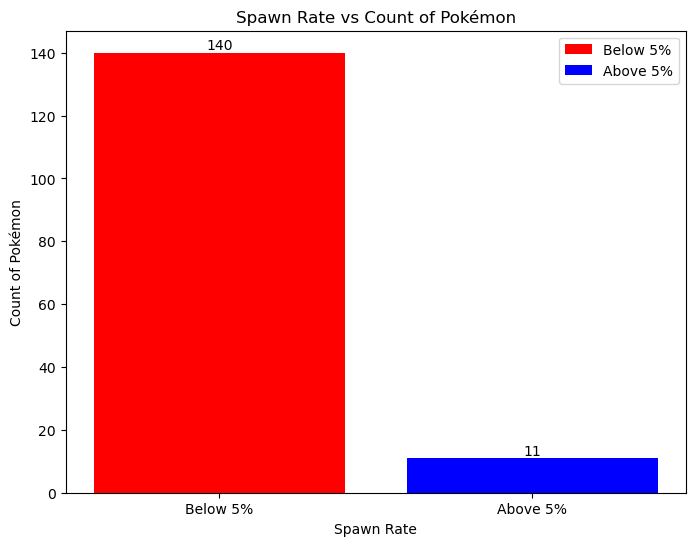

In [5]:
# Subset the data based on spawn rate conditions
below_5_percent = data[data['Spawn Rate'] < 0.05]
above_5_percent = data[data['Spawn Rate'] >= 0.05]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart for spawn rate below 5%
ax.bar('Below 5%', len(below_5_percent), color='red', label='Below 5%')

# Plot the bar chart for spawn rate above 5%
ax.bar('Above 5%', len(above_5_percent), color='blue', label='Above 5%')

# Set labels and title
ax.set_xlabel('Spawn Rate')
ax.set_ylabel('Count of Pokémon')
ax.set_title('Spawn Rate vs Count of Pokémon')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the legend
ax.legend()

# Show the plot
plt.show()


Insight:

A total of 140 numbers of Pokemons are having spawn rate of less than 5%

In [6]:
# Filter the DataFrame by weaknesses
filtered_df = data[data['Weaknesses'].str.split(",").apply(len) < 4]

# Get the names of the Pokemons whose Weaknesses is  less than 4
pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons whose weaknesses is less than 4:{pokemon_names}")


Pokemons whose weaknesses is less than 4:['Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie', 'Metapod', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran ♀ (Female)', 'Nidorina', 'Nidoran ♂ (Male)', 'Nidorino', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Tentacool', 'Tentacruel', 'Ponyta', 'Rapidash', 'Magnemite', 'Magneton', "Farfetch'd", 'Doduo', 'Dodrio', 'Seel', 'Grimer', 'Muk', 'Shellder', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Koffing', 'Weezing', 'Chansey', 'Kangaskhan', 'Horsea', 'Seadra', 'Goldeen', 'Seaking', 'Staryu', 'Mr.

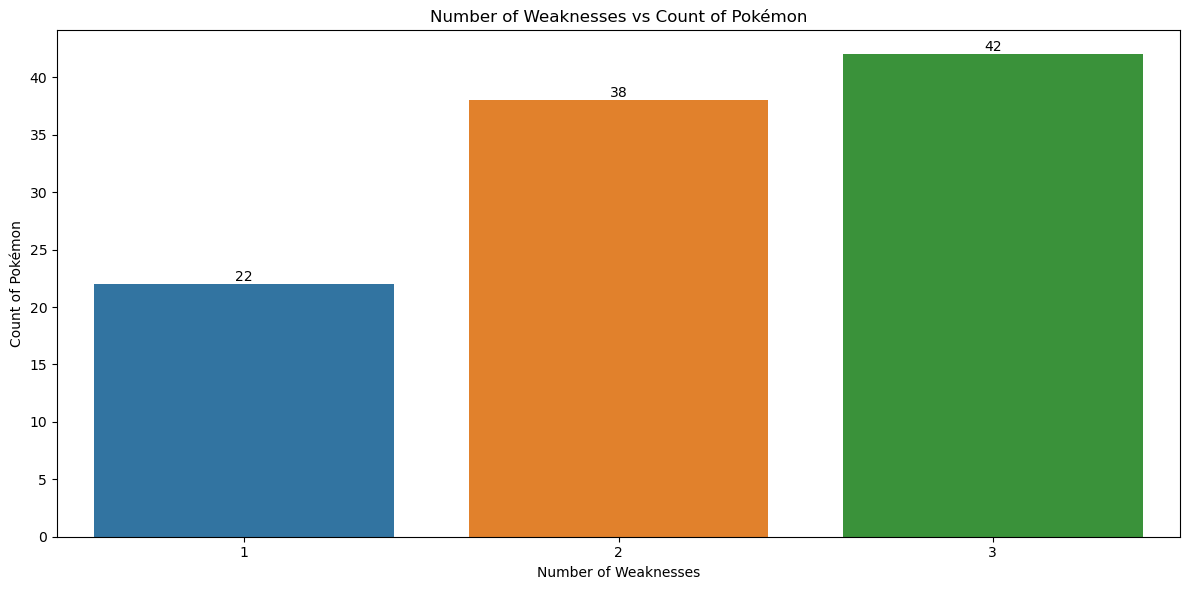

In [7]:
# Create a figure and set its size
plt.figure(figsize=(12, 6))

# Count the number of weaknesses for each Pokémon
weakness_counts = filtered_df['Weaknesses'].str.count(',') + 1

# Count the occurrences of each unique number of weaknesses and sort them in ascending order
count_data = weakness_counts.value_counts().sort_index()

# Create a bar plot using seaborn
sns.barplot(x=count_data.index, y=count_data.values)

# Add data labels to the bars
for i, count in enumerate(count_data.values):
    # Add the count as a label at the center of each bar
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set the x-axis label
plt.xlabel('Number of Weaknesses')

# Set the y-axis label
plt.ylabel('Count of Pokémon')

# Set the plot title
plt.title('Number of Weaknesses vs Count of Pokémon')

# Adjust the layout to prevent overlapping of elements
plt.tight_layout()

# Display the plot
plt.show()

Insight:

From graph it is clear that:

22 numbers of pokemon who has 1 weakness

38 number of pokemon has 2 weaknesses.

42 number of pokemons having 3 weaknesses.

Hence a total of 102 numbers of Pokemons are having Weaknesses of less than 4.


In [8]:
# Filter the Dataframe by multipliers.
filtered_df = data[data['Multipliers'] == '0']

# Get the names of the Pokemons who are not having any Multipliers
pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons having No Multipliers:{pokemon_names}")

Pokemons having No Multipliers:['Venusaur', 'Charizard', 'Blastoise', 'Butterfree', 'Beedrill', 'Pidgeot', 'Raticate', 'Fearow', 'Arbok', 'Raichu', 'Sandslash', 'Nidoqueen', 'Nidoking', 'Clefable', 'Ninetales', 'Wigglytuff', 'Golbat', 'Vileplume', 'Parasect', 'Venomoth', 'Dugtrio', 'Persian', 'Golduck', 'Primeape', 'Arcanine', 'Poliwrath', 'Alakazam', 'Machamp', 'Victreebel', 'Tentacruel', 'Golem', 'Rapidash', 'Slowbro', 'Magneton', "Farfetch'd", 'Dodrio', 'Dewgong', 'Muk', 'Cloyster', 'Gengar', 'Onix', 'Hypno', 'Kingler', 'Electrode', 'Exeggutor', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Weezing', 'Rhydon', 'Chansey', 'Tangela', 'Kangaskhan', 'Seadra', 'Seaking', 'Starmie', 'Mr. Mime', 'Scyther', 'Jynx', 'Electabuzz', 'Magmar', 'Pinsir', 'Tauros', 'Gyarados', 'Lapras', 'Ditto', 'Vaporeon', 'Jolteon', 'Flareon', 'Porygon', 'Omastar', 'Kabutops', 'Aerodactyl', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres', 'Dragonite', 'Mewtwo', 'Mew']


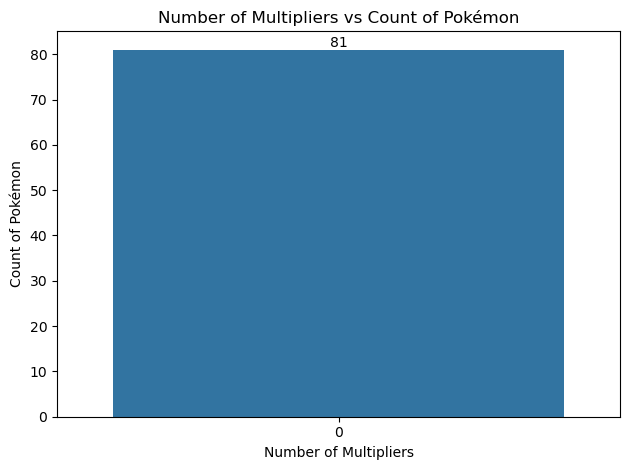

In [9]:
# Count the number of multipliers for each Pokémon
multiplier_counts = filtered_df['Multipliers'].str.count(',') 

# Count the occurrences of each unique number of multipliers and sort them in ascending order
count_data = multiplier_counts.value_counts().sort_index()

# Create a bar plot using seaborn
sns.barplot(x=count_data.index, y=count_data.values)

# Add data labels to the bars
for i, count in enumerate(count_data.values):
    # Add the count as a label above each bar
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set the x-axis label
plt.xlabel('Number of Multipliers')

# Set the y-axis label
plt.ylabel('Count of Pokémon')

# Set the plot title
plt.title('Number of Multipliers vs Count of Pokémon')

# Adjust the layout to prevent overlapping of elements
plt.tight_layout()

# Display the plot
plt.show()

Insight:

A total of 81 numbers of Pokemons are having no Multipliers.

In [10]:
# Filter the data by Previous and Next Evolutions.
filtered_df = data[(data['Previous Evolution'].str.count('>') <= 2) | (data['Next Evolution'].str.count('>') <= 2)]

# Get the names of the Pokemons who are  having more than 2 Evolutions
pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons not having more than 2 Evolutions: {pokemon_names}")
print(len(pokemon_names))



Pokemons not having more than 2 Evolutions: ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran ♀ (Female)', 'Nidorina', 'Nidoqueen', 'Nidoran ♂ (Male)', 'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool', 'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash', 'Slowpoke', 'Slowbro', 'Magnemit

Insight:

A total of 126 Pokemons do not have more than 2 Evolutions.

In [11]:
# Function to convert the time into seconds.
def time_to_seconds(time):
    if isinstance(time, str):
        minutes, seconds = map(int, time.split(':'))
        return minutes * 60 + seconds
    else:
        return 0

In [12]:
# Filtering the data based on Spawn Time
filtered_df = data[data['Spawn Time'].apply(time_to_seconds) < 300]

# Get the names of the Pokemons with spawn time less than 300 Seconds
pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons having Spawn Time Less than 300 Seconds: {pokemon_names}")

#Finding Number of Pokemons with spawn time less than 300 Seconds.
print(len(pokemon_names))

Pokemons having Spawn Time Less than 300 Seconds: ['Squirtle', 'Blastoise', 'Metapod', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Fearow', 'Arbok', 'Pikachu', 'Sandshrew', 'Nidoran ♀ (Female)', 'Nidoran ♂ (Male)', 'Clefairy', 'Clefable', 'Ninetales', 'Golbat', 'Oddish', 'Paras', 'Parasect', 'Venonat', 'Diglett', 'Meowth', 'Persian', 'Psyduck', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwrath', 'Abra', 'Machop', 'Machamp', 'Bellsprout', 'Tentacool', 'Graveler', 'Ponyta', 'Rapidash', 'Slowbro', 'Magnemite', "Farfetch'd", 'Dodrio', 'Muk', 'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak', 'Hitmonlee', 'Lickitung', 'Rhyhorn', 'Chansey', 'Kangaskhan', 'Horsea', 'Seadra', 'Goldeen', 'Mr. Mime', 'Electabuzz', 'Pinsir', 'Tauros', 'Gyarados', 'Ditto', 'Jolteon', 'Porygon', 'Kabuto', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew']
81


Insight:

A total of 81 Pokemons have Spawn time less than 300 Seconds.

In [13]:
filtered_df = data[data['Type'].str.split(',').apply(len) >2]

pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons having more than 2 Capabilities: {pokemon_names}")
print(len(pokemon_names))

Pokemons having more than 2 Capabilities: []
0


Insight:

No Pokemon is having more than 2 types of capabilities.